# Semana 2 - Videoula Ajustes | Modelagem e Inferência Estatística – PES310

# Exercício 1
A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos veículos disponíveis que apresente algumas informações importantes para treinar os novos vendedores. 
A base de dados foi criada em um documento de texto e contém as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir a velocidade de 100km/h: cemm. 
*   Número de cilindros: nu_cy. 
*   Tipo de motor, aspirado (0) ou turbo (1): Etype.


Após ter realizado a análise dos dados apresentados, obter as equações da reta de mínimos quadrados para prever o consumo de combustível padrão de acordo com a capacidade volumétrica, e, se necessário, separe os dados de acordo com o tipo de motor.


In [2]:
#@title Importar a base de dados
#upload carst.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'numpy'

In [ ]:
#Verificar se os dados foram importados
print (uploaded['carst.csv'][:200].decode('utf-8') + '...')

In [ ]:
#Observar os dados
import io
#import pandas as pd
df = pd.read_csv(io.StringIO(uploaded['carst.csv'].decode('utf-8')))
df.head(30)


In [ ]:
#@title tratamento de dados 
df1 = pd.DataFrame(data=df)
c0=df1["brand/model/year"]
c1=df1["cap_vol"]
c2=df1["consumo"]
c3=df1["power"]
c4=df1["weight"]
c5=df1["cemm"]
c6=df1["nu_cy"]
c7=df1["Etype"]

In [ ]:
# Consumo vs. potência para todos os carros 
df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df1['cap_vol'],df1['consumo'])
plt.xlabel('Capacidade volumétrica');
plt.ylabel('Consumo de combustível')
plt.grid(True)
plt.show()

# Obter a equação da reta de mínimos quadrados - Opção 1
$y= \beta_0 + \beta_1 x_1$  
onde:

$\hat{\beta_1}=\frac{S_xy}{S_xy} $

$\beta_0=\bar{y}-\hat{\beta_1}x_i $

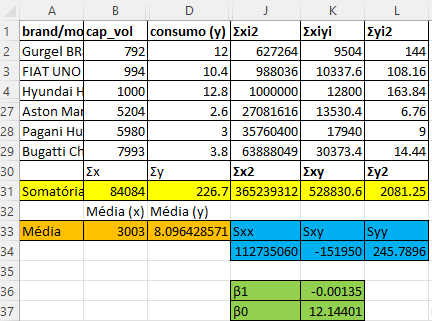

In [ ]:
# fonte: Adaptado de https://github.com/OpenGenus/quark/blob/master/code/code/artificial_intelligence/src/Linear_Regression/linear_regression.py
#import numpy as np
#import matplotlib.pyplot as plt
def estimate_coef(x, y):
    # Número de amostras
    n = np.size(x)
 
    # média dos valores x e y
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # Calculo da relação cruzada e correlação de x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # Aplicar as fórmulas para obter os parÂmetros beta 0 e beta 1
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

 #criar gráfico para observar o resultado
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.grid(True)
    plt.show()
 
def main():
    # definir os dados (variáveis) x e y
    x= df['cap_vol']  # capacidade volumêtrica, variável preditora
    y= df['consumo'] # consumo, variável resposta  
 
 
    # estimar os coeficientes ou parâmetros
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotar a curva de regressão linear
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

## Observar os dados com a reta obtida 

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='cap_vol', y='consumo', data=df);plt.grid(True)

## Criar duas bases de dados para motor aspirado e motor turbo

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='power', y='consumo',hue='Etype', data=df1);plt.grid(True)

## Obter a Equação da reta de regressão para os subconjuntos de dados

### Equação da reta Consumo vs. Potência - Todos os motores
Considerando todos os carros:
$y= \beta_0 + \beta_1 x_1$  

$y= 12,14401  -0.00135 x_1$  



### Equação da reta Consumo vs. Potência - Motor Aspirado
Considerando os carros com motor aspirado:

$y= \beta_0 + \beta_1 x_1$  

$y= 11.72962 - 0.0012593 x_1$  



### Equação da reta Consumo vs. Potência  - Motor Turbo
Considerando os carros com motor turbo:

$y= \beta_0 + \beta_1 x_1$  

$y= 12.320915 -0.001429x_1$  


# Obter a equação da reta de mínimos quadrados - Opção 2
$y= \beta_0 + \beta_1 x_1$  

In [ ]:
#usando numpy
y = c2
#definir a vriável preditora
x = c1
z = np.polyfit(x,y,1)
print('y= {0} {1}x'.format(z[1],z[0]))

# Obter a equação da reta de mínimos quadrados - Opção 3
$y= \beta_0 + \beta_1 x_1$  

In [ ]:
#usando statsmodels.api
#https://www.statology.org/sst-ssr-sse-in-python/
import statsmodels.api as sm
#definir a variável resposta
y = df1['consumo']
#definir a variável preditora
x = df1[['cap_vol']]
#adicionar uma constante preditora
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit() #atenção esta variável será usada no IC
print(modelo.summary())
# mais infomrações https://www.statsmodels.org/stable/index.html


In [ ]:
import statsmodels.api as sm
dfmo = pd.DataFrame(modelo.summary().tables[1].data)
# Select first row as column names:
dfmo.columns = dfmo.iloc[0, :]
# Select first column as row names
dfmo.index = dfmo.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
dfmo = dfmo.iloc[1:, 1:]
# Print relevant info only
print(dfmo.iloc[:,[0, 1, 4, 5]])

##Calcular os valores esperados de Y
$\hat{y}_i=\hat{\beta_0} + \hat{\beta_1} x_i$ 

In [ ]:
#obter os valores esperados de y
#$\hat{y}_i=\hat{\beta_0} + \hat{\beta_1} x_i$ 
ychapeu= modelo.fittedvalues
ychapeu
dfy = pd.DataFrame(data=ychapeu)
dfy

## Calcular os resíduos

In [ ]:
#resíduos
res=ychapeu-c2
res

## Calcular o quadrado do resíduo

In [ ]:
# Quadra dos resíduos
res2=res**2
res2

In [ ]:
#@title Observar os valores em tabela
from tabulate import tabulate
df_yo = pd.DataFrame(c2).T
df_ych = pd.DataFrame(dfy).T
df_ycho = pd.DataFrame(res).T
df_ycho2 = pd.DataFrame(res2).T
table = [df_yo,df_ych,df_ycho,df_ycho2]
print(tabulate(table))

In [ ]:
#@title Calcular SQE e SQT Alternativa 1
#Adaptado de https://www.statology.org/sst-ssr-sse-in-python/
import numpy as np

#calcular SQE--> Baseado nos valores esperados
sqe = np.sum((ychapeu - df.consumo)**2)
print("SQE=", sqe)

#calcular SQT-->Baseado nos valores observados
sqt = np.sum((c2 - df.consumo.mean())**2)
print("SQT=", sqt)

#calcular SQR
sqr = sqt - sqe
print("SQR=",sqr)



# Calcular o coeficiente de determinação $r^2$

In [ ]:
r2=1-sqe/sqt
print("coeficiente de determinação=",r2, "ou",r2*100, "%")

# Calcular variância estimada $s^2$ e devio padrão estimado $s$

In [ ]:
# variância estimada $s^2$ e desvio padrão estimado $s^2$
s2=sqe/(len(c2)-2)
s=pow(s2,1/2)
print('variância estimada= {0}, desvio padrão estimado= {1}'.format(s2,s))

Na sequência observe uma nova alternativa para calcular as variáveis $S_{xx},S_{xy},S_{yy}$ e o coeficiente de correlação (como plus) em uma única função.

In [ ]:
#O seguinte código pode também ser usado previamente para calcular SQE, SQT, SQR e r2 (Alternativa 2)
# fonte: Adaptado de https://www.geeksforgeeks.org/sum-function-python/
def linreg(X, Y):
    """
    retorna a solução b0 e b1 para a reta y = b0 + b1x e todas as somatórias necessárias
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x           # Somatória do termos x
        Sy = Sy + y           # Somatória do termos y
        Sxx = Sxx + x*x       # Somatória do termos x^2
        Syy = Syy + y*y       # Somatória do termos y^2
        Sxy = Sxy + x*y       # Somatória do termos x vezes y
    det = Sxx * N - Sx * Sx   # variável auxiliar
    Sxxt= Sxx - Sx*Sx/N       # Termo Sxx
    Sxyt= Sxy - Sx*Sy/N       # Termo Sxy  
    Syyt= Syy - Sy*Sy/N       # Termo Syy  
    r=Sxyt/pow((Sxxt*Syyt), 1/2)
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det, Sx, Sy, Sxx,  Syy , Sxy, Sxxt, Sxyt, Syyt,r


In [ ]:
#Mostrar os resultados
b1,b0,sox,soy,sox2,soy2,soxy,sxx,sxy,syy,corr = linreg(df1['cap_vol'],df1['consumo'])  #
print('b0= {0},b1= {1}'.format(b0,b1))
print('Somatória x= {0}, Somatória y= {1},Somatória xy= {2}'.format(sox,soy,soxy))
print('Somatória x^2= {0}, Somatória y^2= {1}'.format(sox2,soy2))
print('Sxx= {0}, Syy {1}, Sxy {2}'.format(sxx,syy,sxy))
print('r= {0}'.format(corr))

Observe que o coeficiente de correlação $r=-0.91$
Observe que o coeficiente de determinação $r^2=0.8325$

## SQE e SQT Alternativa 2
Visto que os valores de Sxx, Syy e Sxy estão disponíveis, pode se também usar a simples susbtituição nas respectivas fórmulas de SQE e SQT


In [ ]:
#SQE e SQT Alternativa 2
sqe=syy-b1*sxy
sqt=syy
sqr=sqt-sqe
sqe,sqt,sqr
print('SQE= {0}, SQT {1}, SQR {2}'.format(sqe,sqt,sqr))

#Verificar o intervalo de confiança de $\beta_1$

Considerando a reta obtida dos dados de todos os motores $y= 12,14401  -0.00135 x_1$.

Para finalizar, calcular o **erro padrão de ${\beta_1}$** com a seguinte equação

$s_{\hat{\beta_1}}=\frac{s}{\sqrt{S_{xx}}}$


In [ ]:
ebeta=s/pow(sxx,1/2)
ebeta

## Probabilidade t-student e intervalo de confiança 

In [ ]:
import statsmodels.api as sm
# Automatic calculation
lm_fit = modelo#sm.OLS(y, x_mat).fit()
# dir(lm_fit)
# Get the summary table with coefficients and other statistics
df = pd.DataFrame(lm_fit.summary().tables[1].data)
# Select first row as column names:
df.columns = df.iloc[0, :]
# Select first column as row names
df.index = df.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
df = df.iloc[1:, 1:]
# Print relevant info only
print(df.iloc[:,[0, 1, 4, 5]])

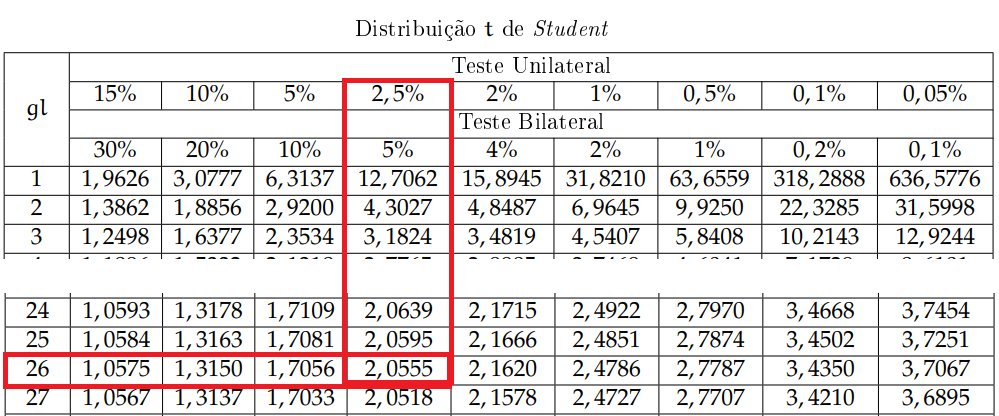

In [ ]:
#usar a tabela tstudent t0,025:N-2
from scipy.stats import t
alpha = 0.05  # nÍvel de significia = 5% 
df = len(c2) - 2  # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
print(f'v: {v}') 

In [ ]:
#Finalmente calcular o IC de b1
ICbeta1= b1+v*ebeta
ICbeta2= b1-v*ebeta
ICbeta2,ICbeta1,b1,v,ebeta
print('O intevalo de confiança é {0} < b1 < {1}'.format(ICbeta2,ICbeta1))